In [1]:
from ultralytics import YOLO  # Import the YOLO class from the Ultralytics library for object detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the YOLO model, pretrained on the COCO dataset
model = YOLO(r'E:\\Thesis\\Project\\src\\CVModels\\Ultralytics\\Models\\Minimap500Images100EphocsPatience53\\weights\\best.pt')

# Load an image
image_path = r'E:\\Thesis\\Project\\screenshots\\20240516_165635\\Image-1.png'

# Perform inference
results = model.predict(image_path)

# Assuming the first element in results is the Results object
results_obj = results[0]

# Access the 'data' attribute for bounding boxes information
boxes = results_obj.boxes.data

# Load the image with PIL
img = Image.open(image_path)

# Create a matplotlib figure and axis for plotting
fig, ax = plt.subplots(1)
ax.imshow(img)

# Loop through each box in the 'data' and add it to the plot
for box in boxes:
    # Extract coordinates
    x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

# Show the plot with the bounding boxes
plt.show()


KeyboardInterrupt: 

# Direction Output

In [7]:
from ultralytics import YOLO 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import uuid

# Load the YOLO model, pretrained on the COCO dataset
model = YOLO(r'E:\\Thesis\\Project\\src\CVModels\\Ultralytics\\Models\\Minimap200Images100EphocsPatience5\\weights\\best.pt')
image_path = r'E:\\Thesis\\Project\\screenshots\\20240516_165635\\Image-1.png'
img = Image.open(image_path)
width, height = img.size


image 1/1 E:\Thesis\Project\screenshots\20240516_165635\Image-1.png: 640x640 1 enemy, 2 allys, 1 player, 196.9ms
Speed: 10.4ms preprocess, 196.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


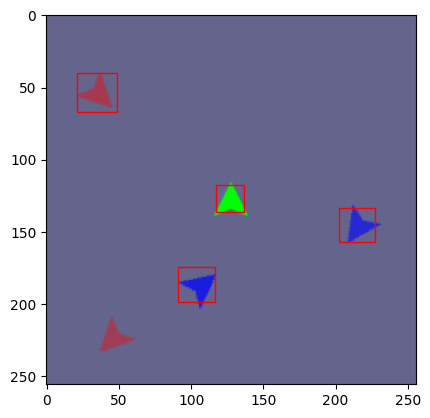

1 Enemies TOP LEFT
1 Enemies CENTER
1 Enemies RIGHT
1 Enemies BOTTOM


In [8]:
# Perform inference
results = model.predict(image_path)

# Assuming the first element in results is the Results object
results_obj = results[0]

# Access the 'data' attribute for bounding boxes information
boxes = results_obj.boxes.data

# Create a matplotlib figure and axis for plotting
fig, ax = plt.subplots(1)
ax.imshow(img)

# Define regions based on imaE:\Thesis\Project\screenshots\20240516_165635\Image-1.png
    "TOP": (width/3, 0, 2*width/3, height/3),
    "TOP RIGHT": (2*width/3, 0, width, height/3),
    "LEFT": (0, height/3, width/3, 2*height/3),
    "CENTER": (width/3, height/3, 2*width/3, 2*height/3),
    "RIGHT": (2*width/3, height/3, width, 2*height/3),
    "BOTTOM LEFT": (0, 2*height/3, width/3, height),
    "BOTTOM": (width/3, 2*height/3, 2*width/3, height),
    "BOTTOM RIGHT": (2*width/3, 2*height/3, width, height)
}

# Initialize a counter for each region
region_counts = {key: 0 for key in regions}

# Loop through each box in the 'data' and add it to the plot
for box in boxes:
    x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2  # Center of the box
    
    # Identify the region of each box
    for region, (rx1, ry1, rx2, ry2) in regions.items():
        if rx1 <= cx <= rx2 and ry1 <= cy <= ry2:
            region_counts[region] += 1
            break

    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

# Show the plot with the bounding boxes
plt.show()

# Print the counts for each region
for region, count in region_counts.items():
    if count > 0:
        message = f"{count} Enemies {region}"
        print(message)



image 1/1 E:\Thesis\Project\screenshots\20240516_165635\Image-1.png: 640x640 2 enemys, 2 allys, 1 player, 176.0ms
Speed: 6.2ms preprocess, 176.0ms inference, 1201.0ms postprocess per image at shape (1, 3, 640, 640)


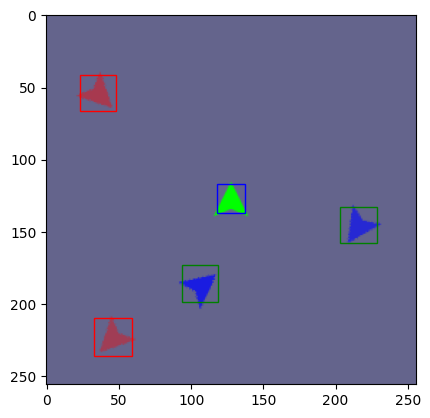

1 Enemy(s) in TOP LEFT
1 Player(s) in CENTER
1 Ally(s) in RIGHT
1 Enemy(s) in BOTTOM LEFT
1 Ally(s) in BOTTOM


In [3]:
import cv2  # OpenCV for image processing
from ultralytics import YOLO  # Import the YOLO class from the Ultralytics library for object detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image_path = r'E:\Thesis\Project\screenshots\20240516_165635\Image-1.png'
model_path = r'E:\Thesis\Project\src\CVModels\Ultralytics\Models\Minimap500Images100EphocsPatience53\weights\best.pt'

def load_image(image_path):
    """Load an image from a specified path and return the image object."""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or path is incorrect: {}".format(image_path))
    return img

def main():
    model = YOLO(model_path)
    img = load_image(image_path)
    height, width, _ = img.shape

    # Perform inference
    results = model.predict(image_path)

    # Assuming the first element in results is the Results object
    results_obj = results[0]

    # Access the 'data' attribute for bounding boxes information
    boxes = results_obj.boxes.data
    class_ids = results_obj.boxes.cls.numpy()

    # Create a matplotlib figure and axis for plotting
    fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Define regions based on image dimensions
    regions = {
        "TOP LEFT": (0, 0, width/3, height/3),
        "TOP": (width/3, 0, 2*width/3, height/3),
        "TOP RIGHT": (2*width/3, 0, width, height/3),
        "LEFT": (0, height/3, width/3, 2*height/3),
        "CENTER": (width/3, height/3, 2*width/3, 2*height/3),
        "RIGHT": (2*width/3, height/3, width, 2*height/3),
        "BOTTOM LEFT": (0, 2*height/3, width/3, height),
        "BOTTOM": (width/3, 2*height/3, 2*width/3, height),
        "BOTTOM RIGHT": (2*width/3, 2*height/3, width, height)
    }

    # Initialize a counter for each region and class
    region_counts = {key: {'enemy': 0, 'ally': 0, 'player': 0} for key in regions}

    # Define colors for each class
    colors = {
        0: 'r',  # Red for enemies
        1: 'g',  # Green for allies
        2: 'b'   # Blue for players
    }
    class_names = {0: 'enemy', 1: 'ally', 2: 'player'}

    # Loop through each box in the 'data' and add it to the plot
    for box, class_id in zip(boxes, class_ids):
        x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
        cx, cy = (x1 + x2) / 2, (y1 + y2) / 2  # Center of the box
        
        # Identify the region of each box
        for region, (rx1, ry1, rx2, ry2) in regions.items():
            if rx1 <= cx <= rx2 and ry1 <= cy <= ry2:
                region_counts[region][class_names[class_id]] += 1
                break

        # Create a Rectangle patch with the color based on class_id
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor=colors[class_id], facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    # Show the plot with the bounding boxes
    plt.show()

    # Print the counts for each region and class
    for region, counts in region_counts.items():
        for class_name, count in counts.items():
            if count > 0:
                message = f"{count} {class_name.capitalize()}(s) in {region}"
                print(message)

if __name__ == "__main__":
    main()
